# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

# Assignment

- Implement a function that takes the following inputs, and finds the minimum using gradient descent
  - Function definition (one variable)
  - Derivative (also a function definition)
  - Starting point
  - Learning rate
- Repeat the above, but with 2 or more variables (you will be tested with different functions with different numbers of variables depending on what you have implemented)
- Use 3-D plots to show the path taken by a 2 variable optimization

In [1]:
# The following imports are assumed for the rest of the problems
import numpy as np
from numpy import cos, sin, pi, exp 
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## TASK 1: A Gradient Descent Function for 1-D functions

Here I have created a function that uses gradient descent to find the minima of a given function. The function takes 4 inputs namely,the function definition, function definition of derivative, starting point and the learning rate. The function then returns the co-ordinate of minima, minimum value, and 2 lists which contain the steps of gradient descent( this helps while creating animations). Here the gradient function was not defined for some problems so I defined one by myself.
<br>
<br>
    One way to find the gradient without being defined is by using the formula 
> f'(x) = [f(x + d) - f(x)]/d

In [2]:
def GradDesc_1D(func_def,der_return,start,alpha):
    n =100
    x_ani = [] #these lists will store the steps of our gradient descent for animation
    y_ani = []
    while(n != 0):
        x_ani.append(start)
        y_ani.append(func_def(start))
        start = start - float(alpha)*der_return(start)
        n-=1
    return start,func_def(start),x_ani,y_ani

## TASK 2: Gradient Descent Function for multi-variable functions

Here I have defined a function to implement gradient descent for multi variable functions. It takes five inputs, function definition,no. of variables, gradiant functions( this is taken in the form of a list), starting point(which is again in list format) and the learning rate.
<br>
The function returns four things: co-ordinates of the minima, minimum value(local), and two lists again like the last function.

In [3]:
def GradDesc_nD(func,variable,grad,start,alpha):
    a = len(grad)
    b = len(start)
    n=1000
    xstep = []
    ystep = []
    if(a !=b | a != variable-1 | b != variable-1): #making sure that the number of variables and data are matching
        return 'The number of variables does not match the input data'
    for i in range(n):
        #print(start)
        xstep.append(np.array(start))
        ystep.append(func(*start))
        for i in range(a):
            start[i] = start[i] - grad[i](*start)*alpha
    return start,func(*start),xstep,ystep   


## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

Here we have a simple quadratic with one minima at x = -1.5. If we implement the 2-D gradient descent function on this, we can see that we get a value pretty close to the minima. As this function has only one point where the slope is zero, we will always end up at the same point if we take reasonable value of learning rate and enough number of iterations.

In [4]:
def f1(x):
    return x ** 2 + 3 * x + 8
#defining the gradient function
def df1(x):
    return 2*x + 3
xbase = np.linspace(-5,5,500)
ybase = f1(xbase)

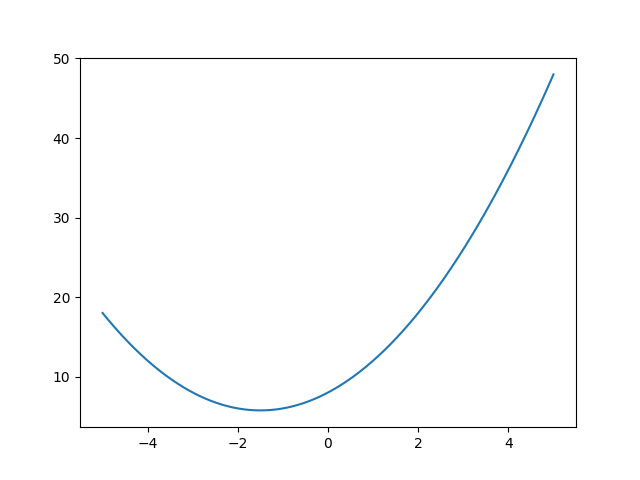

-1.4999999990833337 5.75


In [5]:
fig1, ax = plt.subplots()
ax.plot(xbase, ybase) #plotting the function
xall1, yall1 = [],[]
lnall1,  = ax.plot([], [], 'ro')
lngood1, = ax.plot([], [], 'go', markersize=10)
locpos,locmin,xan,yan = GradDesc_1D(f1,df1,3,0.1)
def func1(frame):  #making a function to call at each frame
    x = xan[frame]
    y = yan[frame]
    lngood1.set_data(x,y)
    xall1.append(x)
    yall1.append(y)
    lnall1.set_data(xall1, yall1)
    pass

#plswork = FuncAnimation(fig1, func1, frames = range(1000) , interval = 1000, repeat = False)
plt.show()
print(locpos,locmin)

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

Here we have a function with 3 variables. We use the gradient descent function defined for multi-variable functions on this function to find its minima. here I have used two starting points and different learning rates. 
<br>
If we choose a starting point of [-10,0] and a learning rate of 1e-5, we see that the function doesnt end up at minima. This is because the learning rate is small and the number of iterations less.
<br>
Instead if we start at [5,1] with a learning rate of 0.1 we end up at a minima of [4,2,2]. But since the values are close by, the animation doesnt look neat. Hence i have used the previous values.

In [6]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4
xt = np.arange(-10,10,0.1)
yt = np.arange(-10,10,0.1)
X,Y = np.meshgrid(xt,yt)

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X,Y,f3(X,Y),color ='b',alpha = 0.5)
minima1,val1,xan,yan = GradDesc_nD(f3,3,[df3_dx,df3_dy],[-10,0],1e-5)
minima2,val2,xan,yan = GradDesc_nD(f3,3,[df3_dx,df3_dy],[5,1],0.1)
lnall,  = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go',markersize = 10)
xall, yall, zall = [],[],[]
def func1(frame):
    a,b = xan[frame]
    y = yan[frame]
    lngood.set_data([a],[b])
    lngood.set_3d_properties([y])
    xall.append(a)
    yall.append(b)
    zall.append(y)
    lnall.set_data(xall,yall)
    lnall.set_3d_properties(zall)
    
    pass
#plswork1 = FuncAnimation(fig, func1, frames = range(1000) , interval = 100, repeat = False) 
plt.show()
print(minima1,val1)
print(minima2,val2)

[0.5754907569702823, 0.03960304547114732] 143.37186672173544
[4.035235174181332, 1.9999999999999996] 2.0000015413659185


## Problem 3 - 2-D function 

Derivatives and limits given. 

In [8]:
xlim4 = [-pi, pi]
ylim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

xt1 = np.arange(-np.pi,np.pi,0.1)
yt1 = np.arange(-np.pi,np.pi,0.1)
X1,Y1 = np.meshgrid(xt1,yt1)

[-1.5707963267948943, -1.5707963267948948] -1.0


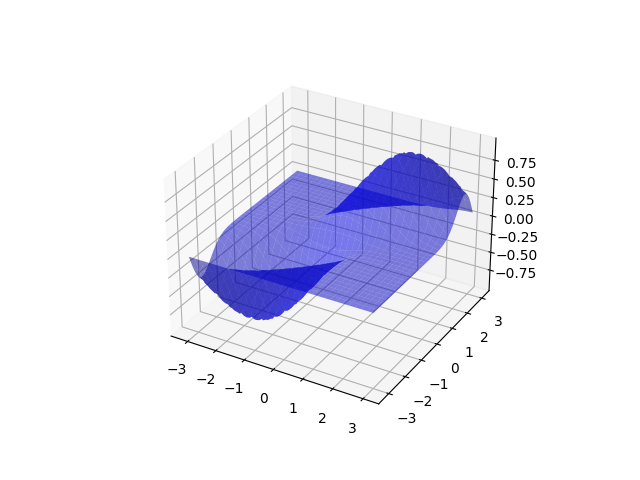

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X1,Y1,f4(X1,Y1),color ='b',alpha = 0.5)
minima,val,xan,yan = GradDesc_nD(f4,3,[f4_dx,f4_dy],[0.24,0],0.1)
lnall,  = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go',markersize = 10)
xall, yall, zall = [],[],[]
def func1(frame):
    a,b = xan[frame]
    y = yan[frame]
    lngood.set_data([a],[b])
    lngood.set_3d_properties([y])
    xall.append(a)
    yall.append(b)
    zall.append(y)
    lnall.set_data(xall,yall)
    lnall.set_3d_properties(zall)
    
    pass
#plswork2 = FuncAnimation(fig, func1, frames = range(1000) , interval = 100, repeat = False)
print(minima,val)

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

Here we have a function with 2 variables which has two minimas in the given domain. So I have chosen two starting points using which we end up at two different points, one is local minima and other is a global minima.

In [10]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def df5(x):
    return (-4)*sin(x)*cos(x)**3 - 3*cos(x)*sin(x)**2 -8*cos(x)*sin(x) - sin(x)
xtemp = np.linspace(0,2*np.pi,200)
ytemp = f5(xtemp)

In [11]:
fig2, ax = plt.subplots()
ax.plot(xtemp, ytemp)
xall2, yall2 = [],[]
lnall2,  = ax.plot([], [], 'ro')
lngood2, = ax.plot([], [], 'go', markersize=10)
pos,minimum,xani,yani = GradDesc_1D(f5,df5,3.0,0.1)
pos1,minimum1,_,_ = GradDesc_1D(f5,df5,3.5,0.1)
def func2(frame):
    x = xani[frame]
    y = yani[frame]
    lngood2.set_data(x,y)
    xall2.append(x)
    yall2.append(y)
    lnall2.set_data(xall2, yall2)
    pass

#plswork3 = FuncAnimation(fig2, func2, frames = range(1000) , interval = 1000, repeat = False)
print(pos,minimum)
print(pos1,minimum1)

1.661660812043789 -4.045412051572552
4.519012831663383 -2.0979683466118546
